In [77]:
# linear algebra
import numpy as np
 
# data processing
import pandas as pd
 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
 
# Algorithms
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score, roc_auc_score
# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [78]:
train = pd.read_csv("development_dataset.csv")
test1 = pd.read_csv("leaderboard_dataset.csv")
test2 = pd.read_csv("Evaluation_dataset.csv")

In [79]:
data = [train]

for dataset in data:
    mean = train["VAR2"].mean()
    std = train["VAR2"].std()
    is_null = dataset["VAR2"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_var2 = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["VAR2"].copy()
    age_slice[np.isnan(age_slice)] = rand_var2
    dataset["VAR2"] = age_slice
    dataset["VAR2"] = train["VAR2"].astype(float)
train["VAR2"].isnull().sum()

0

In [80]:
data = [test1]
for dataset in data:
    mean = test1["VAR2"].mean()
    std = test1["VAR2"].std()
    is_null = dataset["VAR2"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_var2 = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["VAR2"].copy()
    age_slice[np.isnan(age_slice)] = rand_var2
    dataset["VAR2"] = age_slice
    dataset["VAR2"] = test1["VAR2"].astype(float)
test1["VAR2"].isnull().sum()

0

In [81]:
train["VAR14"] = train["VAR14"].replace('.', '13')
train["VAR14"] = train["VAR14"].astype(float)

In [82]:
test1["VAR14"] = test1["VAR14"].replace('.', '13')
test1["VAR14"] = test1["VAR14"].astype(float)

In [83]:
data = [train,test1]
columns = ["VAR3","VAR4","VAR6","VAR7","VAR8","VAR9","VAR10","VAR11","VAR12","VAR13","VAR15","VAR16","VAR17"]
for dataset in data:
    for x in columns:
        mean = dataset[x].mean()
        std = dataset[x].std()
        is_null = dataset[x].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_var2 = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        age_slice = dataset[x].copy()
        age_slice[np.isnan(age_slice)] = rand_var2
        dataset[x] = age_slice
        dataset[x] = dataset[x].astype(float)
dataset[x].isnull().sum()

0

In [84]:
data = [train]
for dataset in data:
    mean = train["VAR5"].mean()
    std = train["VAR5"].std()
    is_null = dataset["VAR5"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_var2 = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["VAR5"].copy()
    age_slice[np.isnan(age_slice)] = rand_var2
    dataset["VAR5"] = age_slice
    dataset["VAR5"] = train["VAR5"].astype(float)
train["VAR5"].isnull().sum()

0

In [85]:
credit_line = {"Low": 1, "Medium": 2, "High": 3}
train["VAR21"] = train["VAR21"].map(credit_line)
train.head(20)

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,42.000000,58.632548,...,100.083403,1.000000,1.0,1.000000,1.540594,1027.00,1,0,100.104991,1
1,2,911.764706,0.027778,26.000000,611.574748,8.181818,1.344479,198.600020,22.086661,61.000000,...,15.012510,19.000000,1.0,6.000000,1.614613,978.00,0,1,146.654045,3
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,23.000000,58.632548,...,210.175146,10.000000,1.0,10.000000,1.044599,835.00,0,0,98.249570,2
3,4,892.941177,3.000000,459.000000,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,185.000000,16.000000,1.0,10.000000,1.145729,927.00,1,0,140.862306,1
4,5,914.117647,0.083333,342.000000,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,11.000000,13.0,11.000000,1.558341,1071.00,1,0,101.268503,3
5,6,794.117647,0.117700,178.571429,624.065797,12.727273,0.665458,197.251700,107.066619,58.632548,...,208.000000,2.000000,1.0,2.000000,1.037051,34.83,0,0,379.736661,1
6,7,987.058823,5.000000,35.714286,611.574748,4.000000,0.970320,197.831747,22.086661,57.000000,...,56.000000,4.000000,1.0,6.000000,1.161463,1000.00,0,1,146.382100,1
7,8,921.176471,0.138889,23.000000,612.660165,18.181818,0.585291,196.956773,71.123926,58.632548,...,80.066722,5.133333,1.0,5.133333,0.975338,894.33,1,0,103.776248,2
8,9,947.058823,2.000000,821.428571,648.330121,23.636364,0.782048,200.301604,37.000000,58.632548,...,20.016681,9.733333,1.0,11.000000,1.141355,1000.00,1,0,96.337349,1
9,10,940.000000,0.137778,107.142857,611.574748,9.090909,0.559710,196.911295,22.086661,47.899686,...,211.000000,9.200000,1.0,9.200000,0.959315,1000.00,1,0,113.433735,2


In [86]:
train["VAR21"] = train["VAR21"].astype(float)

In [87]:
train = train.drop(["VAR17"], axis=1)
#train = train.drop(["VAR9"], axis=1)
#train = train.drop(["VAR4"], axis=1)
test1 = test1.drop(["VAR17"], axis=1)
#test1 = test1.drop(["VAR9"], axis=1)
#test1 = test1.drop(["VAR4"], axis=1)

In [88]:
train = train.drop(["VAR1"], axis=1)
X_train = train.drop("VAR21", axis=1)
Y_train = train["VAR21"]
#Y_train = label_binarize(Y_train, classes=[1, 2, 3])
X_test1  = test1.drop("VAR1", axis=1).copy()

In [27]:
# Instantiate our model
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.01, subsample= 0.8
                  )
xg.fit(X_train, Y_train)
xg_predictions = xg.predict(X_test1)
Y_pred10 = xg_predictions
acc_xg = round(xg.score(X_train, Y_train) * 100, 2)
print (acc_xg)

58.54


In [23]:
predictions10 = Y_pred10
submission = pd.DataFrame({'no.':test1['VAR1'], 'cl':predictions10})
credit_line_reverse = {1.0: "Low", 2.0 : "Medium", 3.0 : "High"}
submission["cl"] = submission["cl"].map(credit_line_reverse)
filename = 'Ezio_IITGuwahati_11.csv'
submission.to_csv(filename, index = False, header = None)
print('saved file: ' + filename)



saved file: Ezio_IITGuwahati_11.csv


In [33]:
# Instantiate our model
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.05, n_estimators=1000,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.01, subsample= 0.8
                  )
xg.fit(X_train, Y_train)
xg_predictions = xg.predict(X_test1)
Y_pred11 = xg_predictions
acc_xg = round(xg.score(X_train, Y_train) * 100, 2)
print (acc_xg)

62.46


In [34]:
predictions11 = Y_pred11
submission = pd.DataFrame({'no.':test1['VAR1'], 'cl':predictions11})
credit_line_reverse = {1.0: "Low", 2.0 : "Medium", 3.0 : "High"}
submission["cl"] = submission["cl"].map(credit_line_reverse)
filename = 'Ezio_IITGuwahati_14.csv'
submission.to_csv(filename, index = False, header = None)
print('saved file: ' + filename)



saved file: Ezio_IITGuwahati_14.csv


In [31]:
# Instantiate our model
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.02, n_estimators=1000,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.01, subsample= 0.8
                  )
xg.fit(X_train, Y_train)
xg_predictions = xg.predict(X_test1)
Y_pred12 = xg_predictions
acc_xg = round(xg.score(X_train, Y_train) * 100, 2)
print (acc_xg)

59.66


In [32]:
predictions12 = Y_pred12
submission = pd.DataFrame({'no.':test1['VAR1'], 'cl':predictions12})
credit_line_reverse = {1.0: "Low", 2.0 : "Medium", 3.0 : "High"}
submission["cl"] = submission["cl"].map(credit_line_reverse)
filename = 'Ezio_IITGuwahati_13.csv'
submission.to_csv(filename, index = False, header = None)
print('saved file: ' + filename)



saved file: Ezio_IITGuwahati_13.csv


In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test1 = sc.transform(X_test1) 

In [71]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test1 = pca.transform(X_test1) 
  
explained_variance = pca.explained_variance_ratio_

In [72]:
principalDf = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

In [73]:
finalDf = pd.concat([principalDf, train[['VAR21']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,VAR21
0,-0.594956,-0.959413,1.0
1,-0.063883,-0.193393,3.0
2,-0.595378,0.069081,2.0
3,-0.346149,-0.115517,1.0
4,0.306334,-0.312299,3.0


In [74]:

pca.explained_variance_ratio_

array([0.5, 0.5])

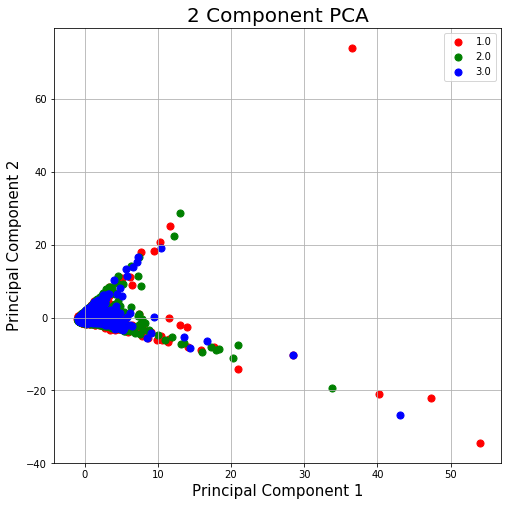

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1.0, 2.0, 3.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['VAR21'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [93]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['num_class'] = 3
params['sub_feature'] = 0.5
params['num_leaves'] = 31
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

LightGBMError: Label must be in [0, 2), but found 3 in label